## INF554 - Machine and Deep Learning Data Challenge: Retweet Prediction
### INF554-Retweet Prediction Challenge 
#### Team members:
##### Talba Youssoufa Mamoudou
##### Alhussein jamil
##### Gnabeyeu Mbiada Emmanuel
Given a collection of tweets related to the French elections predict the number of retweets

### Introduction
>The goal of this data challenge is to study and apply machine learning/artificial intelligence techniques to a real-world regression problem. In this regression problem, your mission is to build a model that can accurately predict the number of retweets a tweet will get. We provide a novel Twitter dataset with the 2022 French presidential election as the central topic. The tweets used for building this dataset date from February 14, 2022 to April 5, 2022. This dataset1 corresponds to a large and coherent corpus consisting of small pieces of text related to the election candidates and major events during their campaigns.

>For each tweet in the test set, our model should predict the number of retweets it will get after its publication. The evaluation metric for this competition is the Mean Absolute Error (MAE). The MAE metric is calculated by dividing the sum of absolute differences between the predicted number of retweets (pi) and the observed number of retweets (ai) by the number of observations (N), i.e., $𝑀𝐴𝐸 =  \frac{1}{N} \sum_{i=1}^N  |p_𝑖 − a_𝑖|$

> We aim for the minimum Mean Absolute Error (MAE) to evaluate our models, i.e., the MAE will be the loss function we use to evaluate our models.

In [ ]:
# Supressing the warning messages
import warnings
import logging
warnings.filterwarnings('ignore')

In [ ]:
#package installation
!pip install -U scikit-learn
!pip install tensorflow_probability==0.12.2
!pip install transformers>=4.0
!pip install tensorflow
!pip install sentencepiece
!pip install verstack
!pip show keras
!pip install spacy
!pip install textblob_fr
!pip install textblob
!pip install flair
!pip install unidecode

     |████████████████████████████████| 8.6 MB 2.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
     |████████████████████████████████| 4.8 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 9.1 MB/s eta 0:00:01
zsh:1: 4.0 not found
  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resol

### Useful Python Libraries

In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
#from verstack.stratified_continuous_split import scsplit # pip install verstack
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import word2vec, FastText
import re
# TF-IDF vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import _stop_words

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
import os
import sys
import sys; 
sys.path.insert(0, '..')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data processing
import pandas as pd
import numpy as np
# Model performance evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error
from sklearn import metrics

from sklearn.decomposition import PCA, NMF,FastICA,TruncatedSVD,IncrementalPCA
from sklearn.cluster import KMeans
#import pandasgui

#from utils.utility_fct import get_table_sql,cross_product

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

import time
import datetime
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(20,10) # for graphs styling
plt.style.use('tableau-colorblind10') # for graph stying

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, NMF,FastICA,TruncatedSVD,IncrementalPCA
#from french_holidays import get_french_holiday_calendar


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta

In [ ]:
#from utils.utility_fct import get_table_sql,cross_product

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

import time
import datetime
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(20,10) # for graphs styling
plt.style.use('tableau-colorblind10') # for graph stying

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, NMF,FastICA,TruncatedSVD,IncrementalPCA
#from french_holidays import get_french_holiday_calendar


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta
import re

import tensorflow as tf
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from unidecode import unidecode
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
assert tf.__version__ >= "2.0"

### Reading the data into python

In [ ]:
data = pd.read_csv('train.csv', header=0) #index_col=0 
data.head()

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,timestamp,TweetID
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],1646978048000,832509
1,populaire,0,0,86,1016,284,[],[],0,[],1647694288000,1388011
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],1647370048000,63896
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],1647256282000,979251
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],1647258374000,1040049


### Data description

In [ ]:
data.describe()

,retweets_count,favorites_count,followers_count,statuses_count,friends_count,verified,timestamp,TweetID
count,353969.000000,353969.000000,3.539690e+05,3.539690e+05,353969.000000,353969.000000,3.539690e+05,3.539690e+05
mean,15.831810,46.655442,2.021548e+04,4.808507e+04,1459.289003,0.030005,1.647004e+12,6.872503e+05
std,241.986723,852.044385,2.598715e+05,1.133854e+05,2502.933271,0.170602,4.846468e+09,4.175793e+05
min,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,1.301178e+12,3.000000e+00
25%,0.000000,0.000000,1.600000e+02,2.972000e+03,214.000000,0.000000,1.647068e+12,3.194490e+05
50%,1.000000,0.000000,7.260000e+02,1.250100e+04,693.000000,0.000000,1.647292e+12,6.719730e+05
75%,3.000000,1.000000,2.283000e+03,4.352200e+04,1804.000000,0.000000,1.647532e+12,1.049644e+06
max,63674.000000,122591.000000,1.441710e+07,8.183508e+06,237269.000000,1.000000,1.647727e+12,1.434456e+06


In [ ]:
data.columns

Index(['text', 'retweets_count', 'favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'mentions', 'urls', 'verified',
       'hashtags', 'timestamp', 'TweetID'],
      dtype='object')

### Defining the problem statement:
> Create a ML model which should predict the number of retweets it will get after its publication.

>Target Variable: retweets_count

> Brute Predictors: text, retweets_count, favorites_count, followers_count, verified etc.
#### Determining the type of Machine Learning
>Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.

#### Looking at the distribution of Target variable

<AxesSubplot:>

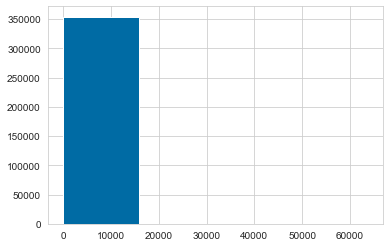

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
data['retweets_count'].hist(bins=4)

### Feature ingeneering
##### Statistical correlation analysis (Feature Selection)
###### Visual exploration of relationship between variables
1. Continuous Vs Continuous ---- Scatter Plot
2. Categorical Vs Continuous---- Box Plot
3. Categorical Vs Categorical---- Grouped Bar Plots
###### Statistical measurement of relationship strength between variables
1. Continuous Vs Continuous ---- Correlation matrix
2. Categorical Vs Continuous---- ANOVA test
3. Categorical Vs Categorical--- Chi-Square test

#### Correlation 
It is crucial to consider the most discriminative features when attempting a task of regression by correlation matrix.

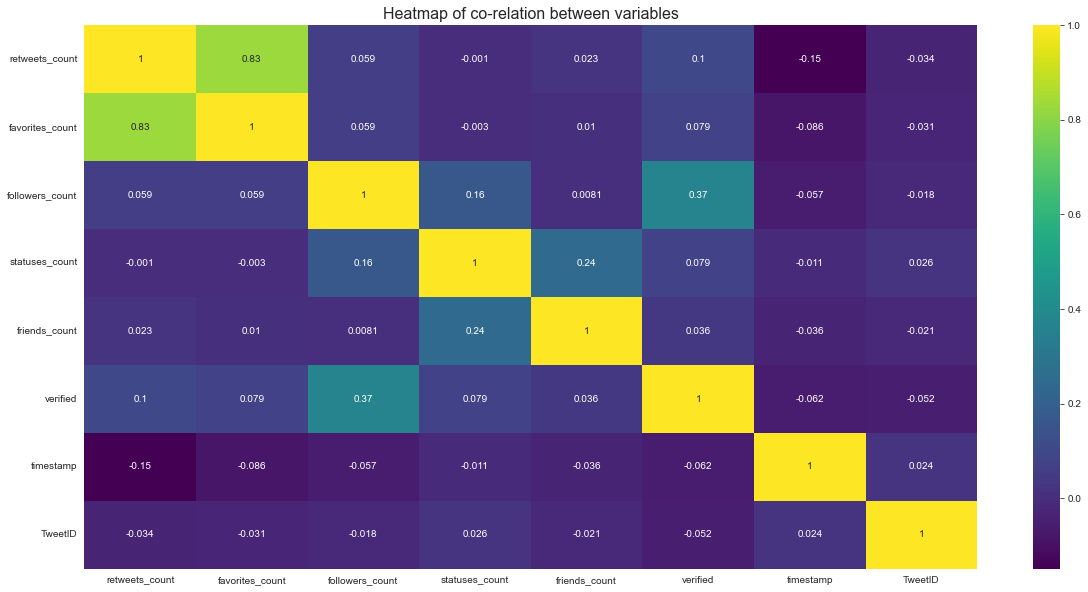

In [ ]:
#Use heatmap to see corelation between variables
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [ ]:
def normalize(y_train):  
    # Choose between standardization and MinMAx normalization
    scaler=StandardScaler()
    # Storing the fit object for later reference
    scaler=scaler.fit(y_train)
    # Generating the standardized values of X
    yhat=scaler.transform(y_train)
    return pd.DataFrame(data=yhat,columns=y_train.columns), scaler

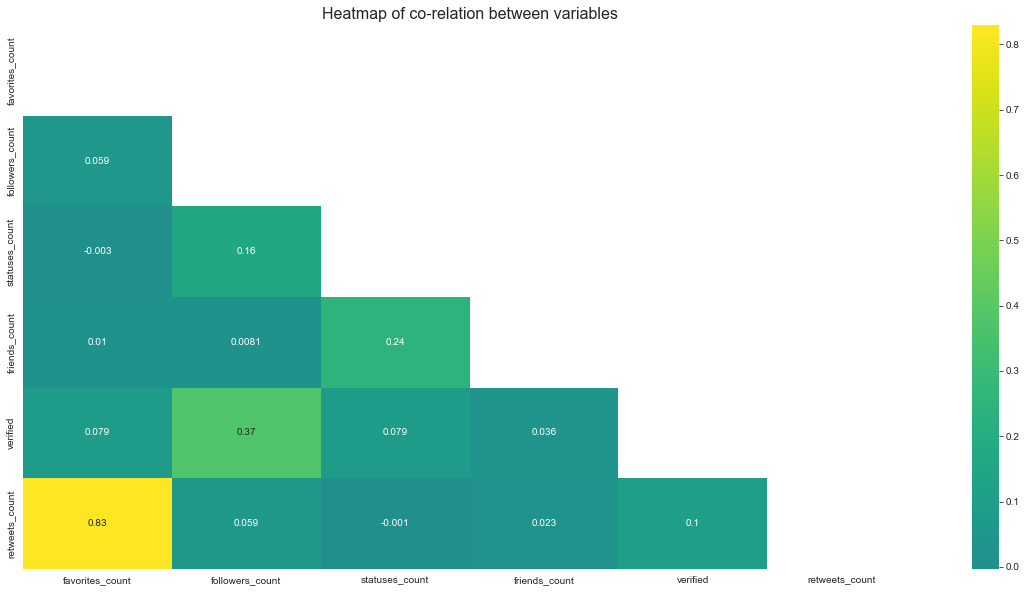

In [ ]:
#Use heatmap to see corelation between variables
Data_num=data[['favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'verified']]

Data_norm, scaler=normalize(Data_num)
Data_norm['retweets_count']=data['retweets_count'].values
mask = np.triu(np.ones_like(Data_norm.corr(), dtype=bool))

sns.heatmap(Data_norm.corr(),mask=mask, center=0, annot=True,cmap='viridis') #  cmap='RdBu', linewidths=1, 
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()


> Feature importance By studying the importance of each feature, we find that the favorites_count has a high correlation than the others, it is the most critical features for the regressor.
The feature importance of Random Forest will also states this later

#### Relationship exploration: Continuous Vs Continuous -- Scatter Charts

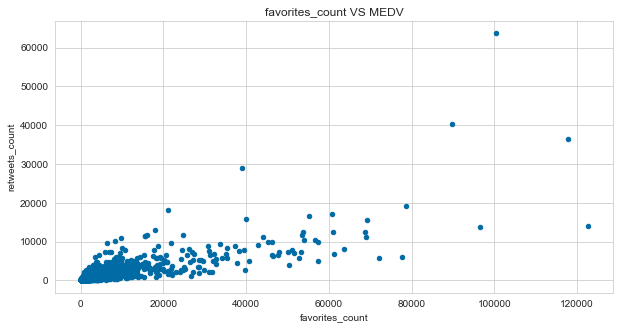

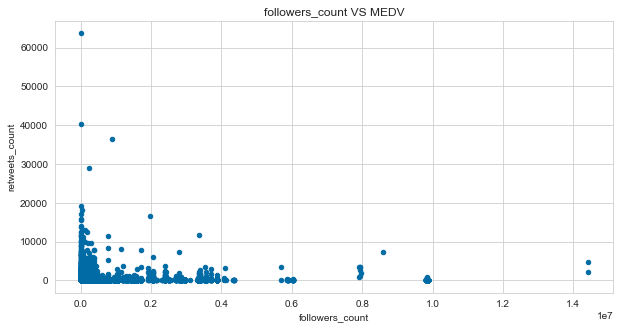

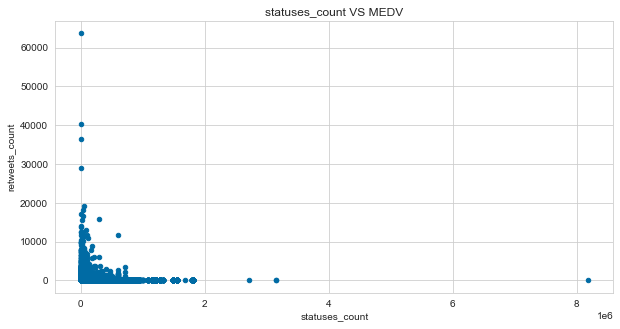

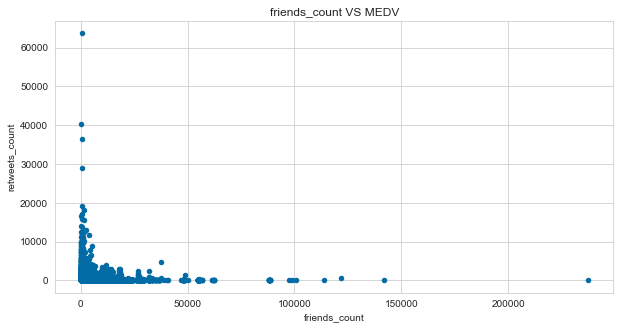

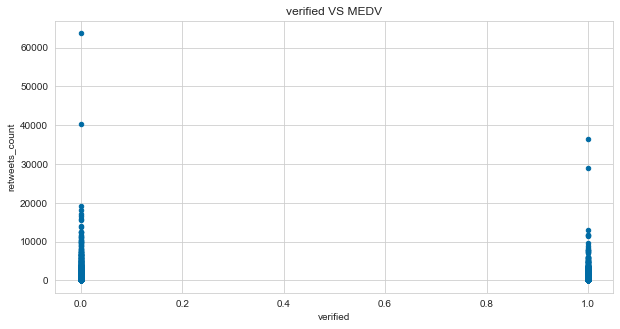

In [ ]:
ContinuousCols=['favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'verified']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='retweets_count', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

#### Preprocessing

In [ ]:
def normalize(y_train):  
    # Choose between standardization and MinMAx normalization
    scaler=StandardScaler()
    # Storing the fit object for later reference
    scaler=scaler.fit(y_train)
    # Generating the standardized values of X
    yhat=scaler.transform(y_train)
    return pd.DataFrame(data=yhat,columns=y_train.columns), scaler

#### Metrics to use: MAE is the most important
But we use also the MSE and the MSLE for model discrimination

In [ ]:
def metrics_(orig, prediction):
    mse = mean_squared_error(y_true=orig,
                                 y_pred=prediction)
    mae = mean_absolute_error(y_true=orig,
                                  y_pred=prediction)
    ms_le = mean_squared_log_error(y_true=np.abs(orig),
                                       y_pred=np.abs(prediction))
    metric = dict()
    metric['MSE'] = mse
    metric['MAE'] = mae
    metric['MSLE'] = ms_le
    return metric

In [ ]:
#Data_num.isna().sum()

### Design and train some models on numerical features

In [ ]:

Xtrain,Xtest=train_test_split(Data_norm,test_size=0.1)

X_train = Xtrain[['favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'verified']]
y_train=Xtrain[['retweets_count']]


X_test = Xtest[['favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'verified']]
y_test=Xtest[['retweets_count']]

### Random Forest

In [ ]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 100, 128]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)

# Creating the model on Training Data
# grid_results = grid.fit(X_train, y_train)
    
# Extract the best decision forest 
#best_clf = grid_results.best_estimator_
   
# Printing all the parameters of Random Forest
#print(best_clf)

# prediction=best_clf.predict(X_test)

In [ ]:
param = {
        'max_depth': 8,
        'min_impurity_decrease': 0.072,
        'min_samples_split': 31,
        'n_estimators': 100,
    }

rf = RandomForestRegressor() #(**param)
# Creating the model on Training Data
rf_b=rf.fit(X_train,y_train)
    
prediction=rf_b.predict(X_test)
    
    
# Measuring Goodness of fit in Training data
coef_determ=r2_score(y_train, rf_b.predict(X_train))
print('RFRegressor R2 Value over the train set', coef_determ)
    
metrics_hist1=metrics_(y_test,prediction)
metrics_hist1['R2']=coef_determ
metrics_hist1 

RFRegressor R2 Value over the train set 0.9438121154720681


{'MSE': 8271.589145583905,
 'MAE': 6.464325515774433,
 'MSLE': 0.26485161670057933,
 'R2': 0.9438121154720681}

#### Plotting the feature_importances of the Random Forest

<AxesSubplot:>

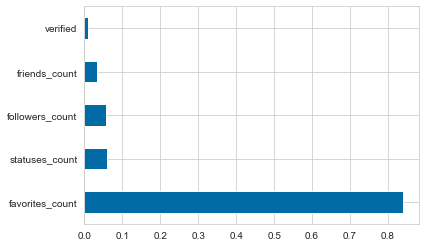

In [ ]:
Predictors_=['favorites_count', 'followers_count',
       'statuses_count', 'friends_count', 'verified'] ## or X_train.colum
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')

> We can see that that favorites_count is the most important feature for this regression problem

### SVM

In [ ]:
"""#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svc = svm.SVC()
#clf = GridSearchCV(svc, parameters)
from sklearn import svm

svregressor= svm.SVR(C=50, kernel='rbf', gamma=0.01) # LinearSVR() #
mulregressor = MultiOutputRegressor(svregressor)
# Printing all the parameters
#print(mulregressor)

# Creating the model on Training Data
SVM=mulregressor.fit(X_train,y_train)
prediction=SVM.predict(X_test)  
# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, SVM.predict(X_train))
print('SVM R2 Value over the train set =: %i' % coef_determ)
    
metrics_hist2=metrics_(y_test,prediction)
metrics_hist2['R2']=coef_determ
metrics_hist2 """

### XGBoost 
###### eXtreme Gradient Boosting

In [ ]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost
params = {
    'min_child_weight': [4, 8],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(5, 11)], #range(6,11)?
    'colsample_bytree': [i / 10.0 for i in range(5, 11)],
    'max_depth': [3, 4, 5], ##
    'eta': [0.01,0.05, 0.1, 0.15,0.2,0.3,0.5]
    }

RegModel=xgboost.XGBRegressor(max_depth=3, 
                          learning_rate=0.1, 
                          n_estimators=1000, 
                          objective='reg:squarederror',
                          booster='gbtree')

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test) 

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, XGB.predict(X_train))
print('XgBoost R2 Value over the train set=:%i' %coef_determ)
    
metrics_hist3=metrics_(y_test,prediction)
metrics_hist3['R2']=coef_determ
metrics_hist3 

XgBoost R2 Value over the train set=:0


{'MSE': 16376.006659901714,
 'MAE': 7.371401039868399,
 'MSLE': 0.2506497592345919,
 'R2': 0.982557788859505}

#### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
param = {
    'learning_rate': 0.022,
     'max_depth': 8,
     'min_impurity_decrease': 0.072,
     'min_samples_split': 31,
     'n_estimators': 100
     #'verbose':2
}

gbr_b = GradientBoostingRegressor(**param)
#Printing all the parameters of the model
print(gbr_b)
# Creating the model on Training Data
gbr_b.fit(X_train,y_train)

prediction=gbr_b.predict(X_test) 

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, gbr_b.predict(X_train))
print('GradientBoostingRegressor R2 Value over the train set=:%i' %coef_determ)
    
metrics_hist4=metrics_(y_test,prediction)
metrics_hist4['R2']=coef_determ
metrics_hist4 

GradientBoostingRegressor(learning_rate=0.022, max_depth=8,
                          min_impurity_decrease=0.072, min_samples_split=31)
GradientBoostingRegressor R2 Value over the train set=:0


{'MSE': 17873.699932128635,
 'MAE': 8.111547966153827,
 'MSLE': 0.7606620298454346,
 'R2': 0.8930920599387301}

#### K-Nearest Neighbor(KNN)

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)


# Measuring Goodness of fit in Training data
coef_determ=metrics.r2_score(y_train, KNN.predict(X_train))
print('KNeighborsRegressor R2 Value over the train set=:%i' %coef_determ)
    
metrics_hist5=metrics_(y_test,prediction)
metrics_hist5['R2']=coef_determ
metrics_hist5

KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor R2 Value over the train set=:0


{'MSE': 11133.638604024824,
 'MAE': 7.345763765290843,
 'MSLE': 0.32344525438712673,
 'R2': 0.8182535471033037}

#### Linear Regression



In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)


# Measuring Goodness of fit in Training data
coef_determ=metrics.r2_score(y_train, LREG.predict(X_train))
print('Multiple Linear Regression R2 Value over the train set=:%i' %coef_determ)
    
metrics_hist6=metrics_(y_test,prediction)
metrics_hist6['R2']=coef_determ
metrics_hist6 

LinearRegression()
Multiple Linear Regression R2 Value over the train set=:0


{'MSE': 13813.459586771136,
 'MAE': 10.072526371752119,
 'MSLE': 1.112887589607305,
 'R2': 0.6936435461005208}

#### MLPRegressor 

In [ ]:
from sklearn.neural_network import MLPRegressor 

grid = [{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]

neural_network = GridSearchCV(
    MLPRegressor(max_iter=1000, warm_start=True, random_state=42),
    grid,
    cv = 10,
)

neural_network = neural_network.fit(X_train, y_train) #y_train.values ?

#neural_network = neural_network.best_estimator_

prediction = neural_network.predict(X_test)

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, neural_network.predict(X_train))
print('MLPRegressor R2 Value over the train set=:%i' %coef_determ)
    
metrics_hist7=metrics_(y_test,prediction)
metrics_hist7['R2']=coef_determ
metrics_hist7 

MLPRegressor R2 Value over the train set=:0


{'MSE': 11896.252808853895,
 'MAE': 7.202093146287153,
 'MSLE': 0.3280683334269066,
 'R2': 0.7229755084058642}

In [ ]:
from collections import defaultdict

mon_dico = defaultdict(list)
model=['RFRegressor','xgboost','GradientBoosting','KNeighborsRegressor','LinRegressor','MLPRegressor'] # 'Prophet','xgb']

dicts = (metrics_hist1,metrics_hist3,metrics_hist4,metrics_hist5,metrics_hist6,metrics_hist7) 
for d in dicts: # you can list as many input dicts as you want here
    for key, value in d.items():
        mon_dico[key].append(value)
mon_dico['Model'].extend(model)
        
m=pd.DataFrame(mon_dico)
m

,MSE,MAE,MSLE,R2,Model
0,8271.589146,6.464326,0.264852,0.943812,RFRegressor
1,16376.006660,7.371401,0.250650,0.982558,xgboost
2,17873.699932,8.111548,0.760662,0.893092,GradientBoosting
3,11133.638604,7.345764,0.323445,0.818254,KNeighborsRegressor
4,13813.459587,10.072526,1.112888,0.693644,LinRegressor
5,11896.252809,7.202093,0.328068,0.722976,MLPRegressor


In [ ]:
m1=m.sort_values(by=['MAE'], ascending=True)
m1=m1.set_index('Model')
m1

,MSE,MAE,MSLE,R2
Model,,,,
RFRegressor,8271.589146,6.464326,0.264852,0.943812
MLPRegressor,11896.252809,7.202093,0.328068,0.722976
KNeighborsRegressor,11133.638604,7.345764,0.323445,0.818254
xgboost,16376.006660,7.371401,0.250650,0.982558
GradientBoosting,17873.699932,8.111548,0.760662,0.893092
LinRegressor,13813.459587,10.072526,1.112888,0.693644


In [ ]:
#m1.to_latex

## Words Processing

##### A function to clean our text data

In [ ]:
import unidecode
def preprocess(df):
    clean_txt = []
    for w in range(len(df.text)):
        text = df['text'][w].lower()
        #remove punctuation
        text = text.replace("["," ")
        text = text.replace("]","")
        text = text.replace("'","")
        text = text.replace(",","")
        text = unidecode.unidecode(text )        
        clean_txt.append(text)
    df['clean'] = clean_txt
    return df
df= preprocess(data)
print(df.loc[261]["clean"])

data["text"] = data["text"] + data["hashtags"].astype(str)
df1= preprocess(data)

faut partager parait croient theorie france


TF-IDF Vectorization

TF-IDF is a composite score representing the power of a given word to uniquely identify the document

It is computed by multiplying Term Frequency(TF) and Inverse Document Frequency(IDF)
TF: (The number of times a word occurs in a document/ total words in that document)
IDF: log (total number of documents/number of documents containing the given word).

IF a word is very common, then IDF is near to zero, otherwise, it is close to 1
The higher the tf-idf value of a word, the more unique/rare occurring that word is.
If the tf-idf is close to zero, it means the word is very commonly used

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gnabeyeuemmanuel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# TF-IDF vectorization of text
corpus = df1['clean'].values
 
#vectorizer = TfidfVectorizer(stop_words=None)
vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('french'))
 
X_ = vectorizer.fit_transform(corpus)
temp=pd.DataFrame(X_.todense())
temp


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.774755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
353965,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
353966,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430075
353967,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### PCA over the text vectorilized to retain the most relevant information/feature

In [ ]:
pca1 = PCA(n_components = 0.9)  #(n_components=0.99)
result1 = pca1.fit_transform(temp)

Cumulative Variances (Percentage):


Text(0, 0.5, 'Explained variance (%)')

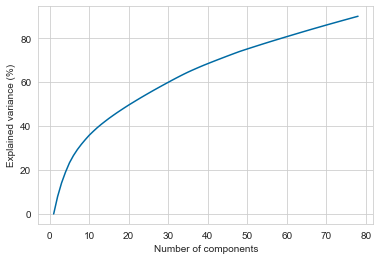

In [ ]:
print("Cumulative Variances (Percentage):")

components = len(pca1.explained_variance_ratio_)
# Make the scree plot
y_h=np.cumsum(pca1.explained_variance_ratio_ * 100)
y_h = np.insert(y_h,0, 0)
plt.plot(range(1, components + 2), y_h)
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
other_predictors = ['favorites_count', 'followers_count',
       'statuses_count', 'friends_count'] # 'favorites_count'
tab =pd.concat([pd.DataFrame(result1),df1[other_predictors]],axis=1)
# print(vectorizer.get_feature_names())
# Choose between standardization and MinMAx normalization
Scaler=StandardScaler()
#PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
ScalerFit=Scaler.fit(tab)
 
# Generating the standardized values of X
tab=ScalerFit.transform(tab)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tab, data['retweets_count'], test_size=0.1)

rf = RandomForestRegressor() #(**param)
# Creating the model on Training Data
rf_b2=rf.fit(tab, data['retweets_count']) # (X_train,y_train)
    
"""prediction=rf_b2.predict(X_test)"""
    
    
# Measuring Goodness of fit in Training data
coef_determ=r2_score(y_train, rf_b2.predict(X_train))
print('RFRegressor R2 Value over the train set', coef_determ)
    
"""metriq_1=metrics_(y_test,prediction)
metriq_1['R2']=coef_determ
metriq_1"""

RFRegressor R2 Value over the train set 0.9438585066263006


"metriq_1=metrics_(y_test,prediction)\nmetriq_1['R2']=coef_determ\nmetriq_1"

##### Prediction

In [ ]:
NewSampleData=pd.read_csv('evaluation.csv', header=0) #index_col=0 

# Adding the target variable
EvalData=NewSampleData.copy()
EvalData["text"] = EvalData["text"] + EvalData["hashtags"].astype(str)
dframe= preprocess(EvalData)

 
X_Eval = vectorizer.transform(dframe['clean'].values)
temp_pca=pd.DataFrame(X_Eval.todense())
resultEval = pca1.transform(temp_pca)
tabEval =pd.concat([pd.DataFrame(resultEval),EvalData[other_predictors]],axis=1)
tabEval=ScalerFit.transform(tabEval)


# Genrating Predictions
Pred=rf_b2.predict(tabEval)
PredResult=pd.DataFrame(Pred, columns=['retweets_count'])
PredResult['TweetID']=EvalData['TweetID']
PredResult.set_index('TweetID').reset_index(drop=False)

PredResult.to_csv('Model_TDIDF_PCA_RForest.csv', index=False)

#### K Means clustering over the text to generate categorical features

In [ ]:
from sklearn.cluster import KMeans
scl = StandardScaler()
dfnorm = scl.fit_transform(temp)

##### Elbow method to determine the optimal number of cluster

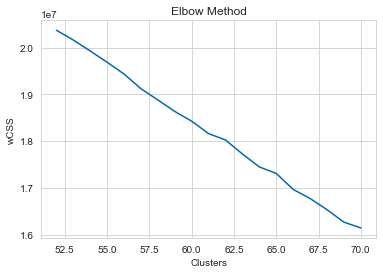

In [ ]:
wCSS = []
for i in range(54,74):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(dfnorm)
    wCSS.append(kmeans.inertia_) #Collects all of the within cluster sum of squares
plt.plot(range(54,74), wCSS,'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

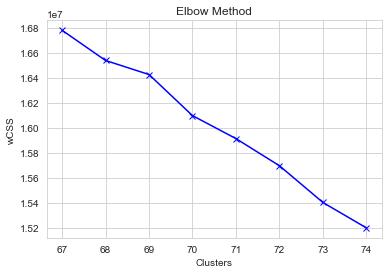

In [ ]:
plt.plot(range(67,75), wCSS[-8:],'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

Here, 68 clusters seems to be optimal based on the criteria mentioned earlier

In [ ]:
true_k=68
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(dfnorm)
preds = model.predict(dfnorm)

In [ ]:
other_predictors = ['favorites_count', 'followers_count',
       'statuses_count', 'friends_count'] # 'favorites_count'
tab =pd.concat([pd.DataFrame(preds),df1[other_predictors]],axis=1)
# print(vectorizer.get_feature_names())

In [ ]:
# Choose between standardization and MinMAx normalization
Scaler=StandardScaler()
#PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
ScalerFit=Scaler.fit(tab)
 
# Generating the standardized values of X
tab=ScalerFit.transform(tab)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tab, data['retweets_count'], test_size=0.1, random_state=428)

In [ ]:
rf = RandomForestRegressor() #(**param)
# Creating the model on Training Data
rf_b=rf.fit(tab,data['retweets_count']) # rf.fit(X_train, y_train)
    
"""prediction=rf_b.predict(X_test)"""
    
    
# Measuring Goodness of fit in Training data
coef_determ=r2_score(y_train, rf_b.predict(X_train))
print('RFRegressor R2 Value over the train set', coef_determ)
    
"""metriq_=metrics_(y_test,prediction)
metriq_['R2']=coef_determ
metriq_ """

RFRegressor R2 Value over the train set 0.9417226626809931


"metriq_=metrics_(y_test,prediction)\nmetriq_['R2']=coef_determ\nmetriq_ "

<AxesSubplot:>

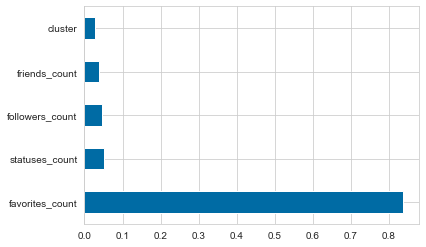

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=['cluster','favorites_count', 'followers_count',
       'statuses_count', 'friends_count'])
feature_importances.nlargest(10).plot(kind='barh')

##### Prediction

In [ ]:
NewSampleData=pd.read_csv('evaluation.csv', header=0) #index_col=0 

# Adding the target variable
EvalData=NewSampleData.copy()
EvalData["text"] = EvalData["text"] + EvalData["hashtags"].astype(str)
dframe= preprocess(EvalData)

 
X_Eval = vectorizer.transform(dframe['clean'].values)
temp2=pd.DataFrame(X_Eval.todense())
dfnorm_Eval = scl.fit_transform(temp2)
preds2 = model.predict(dfnorm_Eval)
tab2 =pd.concat([pd.DataFrame(preds2),EvalData[other_predictors]],axis=1)
tab2=ScalerFit.transform(tab2)

# Genrating Predictions
Predict=rf_b.predict(tab2)
PredictResult=pd.DataFrame(Predict, columns=['retweets_count'])
PredictResult['TweetID']=EvalData['TweetID']
PredictResult.set_index('TweetID').reset_index(drop=False)

PredictResult.to_csv('ModelClusterRForest.csv', index=False)


#### Transfer learning with Word2Vec
Transfer learning is one of the most important breakthroughs in machine learning! It helps us to use the models created by others.

So if we can use the pre-trained models from others, that helps to resolve the problem of converting the text data to numeric data, and we can continue with the other tasks, such as classification or sentiment analysis, etc.

Stanford’s GloVe and Google’s Word2Vec are two really popular choices in Text vectorization using transfer learning.

Word2Vec conversion:

Now we will use the Word2Vec representation of words to convert the above document term matrix to a smaller matrix, where the columns are the sum of the vectors for each word present in the document.


The numeric representation of each word is taken from Word2Vec.
All the vectors are added, hence producing a single vector
That single vector represents the information of the sentence, hence treated as one row

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

This contains a binary file, that contains numeric representations for each word.

In [ ]:
#Installing the gensim library required for word2Vec and Doc2Vec
# !pip install gensim

In [ ]:
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,)

In [ ]:
# Each word is a vector of 300 numbers
GoogleModel['hello'].shape

(300,)

##### Converting every sentence to a numeric vector

In [ ]:
df= preprocess(data)
df.head()

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,timestamp,TweetID,clean
0,rt refarcir macron ans nom prépare[],3,0,3682,453535,3628,[],[],0,[],1646978048000,832509,rt refarcir macron ans nom prepare
1,populaire[],0,0,86,1016,284,[],[],0,[],1647694288000,1388011,populaire
2,faut dégager cinglé[],3,1,1944,28234,1995,[],[],0,[],1647370048000,63896,faut degager cingle
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],1647256282000,979251,enseignants mettre prescriptions president rep...
4,mafieuse oppressive macron[],0,0,13957,25311,10841,[],[],0,[],1647258374000,1040049,mafieuse oppressive macron


#### Defining a function which takes text input and returns one vector (300,1) for each sentence

In [ ]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Creating empty dataframe to hold sentences
    vocab = GoogleModel.key_to_index.keys()
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(inpTextData.shape[0]): 
        
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        # Word tokenization
        L=word_tokenize(inpTextData[i])
        for word in L:
            #print(word)
            if word in vocab:    
                Sentence=Sentence+GoogleModel[word]
            else:
                print("Word {} not in vocab".format(w))
        # Appending the sentence to the dataframe
        W2Vec_Data=pd.concat([W2Vec_Data,pd.DataFrame([Sentence])]) 
    return(W2Vec_Data)

#### Defining a class which takes text input and returns one vector for each sentence (average of words of the sentences type (300,1))

In [ ]:
class MeanEmbeddingVectorizer(object):

	def __init__(self, word_model):
		self.word_model = word_model
		self.vector_size = word_model.vector_size

	def fit(self):  # comply with scikit-learn transformer requirement
		return self

	def transform(self, docs):  # comply with scikit-learn transformer requirement
		doc_word_vector = self.word_average_list(docs)
		return doc_word_vector

	def word_average(self, sent):
		"""
		Compute average word vector for a single doc/sentence.
		:param sent: list of sentence tokens
		:return:
			mean: float of averaging word vectors
		"""
		mean = []
		for word in sent:
			if word in self.word_model.key_to_index.keys():
				mean.append(self.word_model.get_vector(word))

		if not mean:  # empty words
			# If a text is empty, return a vector of zeros.
			logging.warning("cannot compute average owing to no vector for {}".format(sent))
			return np.zeros(self.vector_size)
		else:
			mean = np.array(mean).mean(axis=0)
			return mean


	def word_average_list(self, docs):
		"""
		Compute average word vector for multiple docs, where docs had been tokenized.
		:param docs: list of sentence in list of separated tokens
		:return:
			array of average word vector in shape (len(docs),)
		"""
		#W2Vec_Data=pd.DataFrame()
		# Appending the sentence to the dataframe
		#for sent in docs:
		#	W2Vec_Data=pd.concat([W2Vec_Data,pd.DataFrame([self.word_average(sent)])]) 
		return pd.DataFrame(np.vstack([self.word_average(sent) for sent in docs])) #W2Vec_Data #

### Preparing Data for ML

In [ ]:
# USING EMBEDDINGS
mean_embedding_vectorizer = MeanEmbeddingVectorizer(GoogleModel)
mean_embedded = mean_embedding_vectorizer.transform(df['clean'])
mean_embedded

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.183669,0.120718,-0.025713,0.164727,-0.053870,0.041582,-0.105712,-0.029629,-0.060605,0.034343,...,0.081558,-0.042998,-0.135590,0.082920,-0.037578,-0.177754,-0.081602,-0.015898,-0.107266,0.165759
1,-0.144394,0.116547,-0.005203,0.164886,-0.079132,0.000031,-0.107788,-0.008972,-0.099365,0.024757,...,0.089981,-0.069687,-0.211273,0.074646,-0.016083,-0.171021,-0.165222,-0.031845,-0.075958,0.170082
2,-0.203267,0.097677,0.032690,0.136214,-0.084566,0.034898,-0.110447,-0.077734,-0.074674,0.010592,...,0.080103,-0.050610,-0.050462,0.072982,-0.033740,-0.117839,-0.102458,-0.041333,-0.153141,0.175907
3,-0.170568,0.120649,-0.011037,0.160649,-0.062853,0.029889,-0.091459,-0.028512,-0.048485,0.010422,...,0.069487,-0.060529,-0.131255,0.073209,-0.021764,-0.154046,-0.083737,-0.023596,-0.095393,0.175784
4,-0.158217,0.111384,0.024886,0.156516,-0.021716,0.015969,-0.101318,-0.008145,-0.036887,0.022650,...,0.099021,-0.063649,-0.169977,0.070346,-0.032005,-0.165616,-0.086459,0.008007,-0.076649,0.164373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,-0.226344,0.132829,-0.027452,0.123873,-0.067237,0.016467,-0.091209,-0.072810,-0.024621,0.018771,...,0.065092,-0.006024,-0.092002,0.063251,-0.038095,-0.166823,-0.087600,-0.054673,-0.102971,0.189291
353965,-0.182956,0.122852,-0.001079,0.141267,-0.057982,0.027713,-0.082205,-0.043834,-0.054246,-0.009590,...,0.073469,-0.057024,-0.114499,0.065258,-0.024504,-0.159617,-0.066625,-0.019574,-0.091891,0.213271
353966,-0.186068,0.103836,0.021764,0.153778,-0.040632,0.049344,-0.140401,-0.046712,-0.047536,0.020877,...,0.090927,-0.004807,-0.121512,0.038462,-0.009084,-0.131958,-0.058380,0.002324,-0.128306,0.190328
353967,-0.194699,0.121847,0.012137,0.157389,-0.071115,-0.006291,-0.078112,-0.043852,-0.042762,-0.009966,...,0.073167,-0.038121,-0.124365,0.089100,-0.032273,-0.184408,-0.120617,-0.020275,-0.076788,0.197370


In [ ]:
mean_embedded.shape

(353969, 300)

In [ ]:
"""nltk.download('punkt')

# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(data['text'])
 
# Checking the new representation for sentences
W2Vec_Data.shape"""

In [ ]:
# Adding the target variable
# Predictors_=X_train.columns
W2Vec_Data=mean_embedded.copy()
W2Vec_Data.reset_index(inplace=True, drop=True)
# Add the others predictors
# W2Vec_Data[Predictors_]=data[Predictors_]
W2Vec_Data['favorites_count']=data['favorites_count']
W2Vec_Data['retweets_count']=data['retweets_count']

W2Vec_Data['TweetID']=data['TweetID']
W2Vec_Data.set_index('TweetID').reset_index(drop=False)
W2Vec_Data.to_csv('EmbbedingW2Vec_Data_.csv')

W2Vec_Data.shape
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,favorites_count,retweets_count,TweetID
0,-0.183669,0.120718,-0.025713,0.164727,-0.053870,0.041582,-0.105712,-0.029629,-0.060605,0.034343,...,0.082920,-0.037578,-0.177754,-0.081602,-0.015898,-0.107266,0.165759,0,3,832509
1,-0.144394,0.116547,-0.005203,0.164886,-0.079132,0.000031,-0.107788,-0.008972,-0.099365,0.024757,...,0.074646,-0.016083,-0.171021,-0.165222,-0.031845,-0.075958,0.170082,0,0,1388011
2,-0.203267,0.097677,0.032690,0.136214,-0.084566,0.034898,-0.110447,-0.077734,-0.074674,0.010592,...,0.072982,-0.033740,-0.117839,-0.102458,-0.041333,-0.153141,0.175907,1,3,63896
3,-0.170568,0.120649,-0.011037,0.160649,-0.062853,0.029889,-0.091459,-0.028512,-0.048485,0.010422,...,0.073209,-0.021764,-0.154046,-0.083737,-0.023596,-0.095393,0.175784,0,0,979251
4,-0.158217,0.111384,0.024886,0.156516,-0.021716,0.015969,-0.101318,-0.008145,-0.036887,0.022650,...,0.070346,-0.032005,-0.165616,-0.086459,0.008007,-0.076649,0.164373,0,0,1040049


#### Dimension reduction by pca:

In [ ]:
pca = PCA(n_components = 0.99)  #(n_components=0.99)
result = pca.fit_transform(mean_embedded)

In [ ]:
X=pd.DataFrame(result)
X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.071970,-0.220818,-0.101123,0.087523,0.212842,0.003118,0.129713,-0.097954,-0.128013,-0.030694,...,-0.006463,-0.049050,0.019439,-0.032274,0.003773,0.006862,0.001280,0.002364,-0.000703,0.007422
1,-0.084154,-0.230160,0.148319,-0.114236,0.010578,-0.137427,0.229362,0.369282,-0.245577,0.206995,...,-0.033516,-0.002999,-0.012418,-0.018942,0.037406,-0.016684,0.006969,-0.036588,-0.009710,-0.026274
2,0.007382,-0.142928,-0.048292,-0.079151,-0.053119,-0.232986,-0.165225,-0.097414,-0.036511,-0.039692,...,0.202640,-0.043810,-0.079559,-0.001392,0.022142,-0.035446,-0.096617,-0.078681,-0.001275,0.003628
3,0.126466,0.013628,0.062934,-0.001928,0.080066,-0.037852,0.041010,0.056976,-0.066886,0.011319,...,-0.008647,-0.028532,-0.014365,-0.010858,0.005743,-0.004098,-0.006246,0.009121,-0.008941,0.020352
4,0.094766,-0.016386,0.049624,0.056850,0.042424,0.046122,0.155537,0.122277,0.091522,-0.031131,...,-0.038126,-0.046009,0.038368,-0.076269,0.013418,-0.002932,-0.011223,-0.025361,-0.009295,0.001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,-0.071575,0.195310,-0.054710,0.011479,0.084500,-0.064768,-0.079414,-0.205884,-0.063594,0.132795,...,0.032193,0.022426,0.030231,-0.029810,-0.008271,0.002014,-0.034486,-0.047354,-0.000629,0.013323
353965,0.133904,-0.033803,0.073734,0.204676,0.098236,-0.066219,-0.058808,-0.024980,0.056268,0.043501,...,0.033633,0.018861,-0.008448,0.008637,0.003990,-0.009414,-0.023599,-0.008126,0.005162,-0.008347
353966,0.133719,-0.110690,-0.170844,0.131979,-0.025735,-0.184470,0.100388,-0.128760,0.049921,-0.068733,...,-0.061419,-0.028331,0.053617,0.028877,-0.014609,0.016197,-0.016810,0.021280,0.001721,-0.014961
353967,-0.038834,0.025170,0.157057,0.086099,0.161427,-0.068741,0.032012,0.157458,0.065316,0.022474,...,0.055653,-0.018889,-0.030075,-0.013559,-0.027058,-0.014951,0.002498,0.039174,-0.017529,0.073021


Cumulative Variances (Percentage):
[19.90652793 31.37351395 41.06127554 48.97155702 56.64113038 63.39491141
 68.90203263 74.10530983 78.95862077 82.76152357 85.79035569 88.3108987
 90.55843849 92.63353668 94.11245514 95.24413729 96.20082667 96.93662216
 97.6036317  98.16395556 98.66994396 99.12348283]


Text(0.5, 1.0, 'Explained variance ratio per singular value')

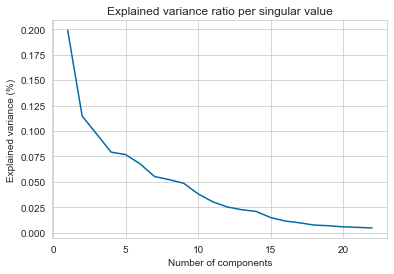

In [ ]:
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
# Make the scree plot
plt.plot(range(1, components + 1), pca.explained_variance_ratio_ )
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title('Explained variance ratio per singular value')
# plt.savefig('ExplainedVarRatio.pdf') 

Text(0, 0.5, 'Explained variance (%)')

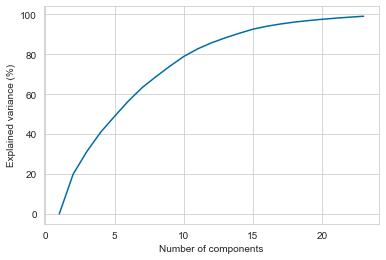

In [ ]:
# Make the scree plot
y_h=np.cumsum(pca.explained_variance_ratio_ * 100)
y_h = np.insert(y_h,0, 0)
plt.plot(range(1, components + 2), y_h)
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

### Comments: 
> 21 (max 22) components explained the essential of information stored by the text data

#### Selecting final predictors for Machine Learning¶

In [ ]:
# Adding the target variable

DataForML=pd.DataFrame(result)

# Add the others predictors 'the ones given by the corr matrix
# which is the most correlated to the target=retweets_count'
DataForML['favorites_count']=data['favorites_count']
DataForML['retweets_count']=data['retweets_count']


DataForML.shape
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,favorites_count,retweets_count
0,-0.071970,-0.220818,-0.101123,0.087523,0.212842,0.003118,0.129713,-0.097954,-0.128013,-0.030694,...,0.019439,-0.032274,0.003773,0.006862,0.001280,0.002364,-0.000703,0.007422,0,3
1,-0.084154,-0.230160,0.148319,-0.114236,0.010578,-0.137427,0.229362,0.369282,-0.245577,0.206995,...,-0.012418,-0.018942,0.037406,-0.016684,0.006969,-0.036588,-0.009710,-0.026274,0,0
2,0.007382,-0.142928,-0.048292,-0.079151,-0.053119,-0.232986,-0.165225,-0.097414,-0.036511,-0.039692,...,-0.079559,-0.001392,0.022142,-0.035446,-0.096617,-0.078681,-0.001275,0.003628,1,3
3,0.126466,0.013628,0.062934,-0.001928,0.080066,-0.037852,0.041010,0.056976,-0.066886,0.011319,...,-0.014365,-0.010858,0.005743,-0.004098,-0.006246,0.009121,-0.008941,0.020352,0,0
4,0.094766,-0.016386,0.049624,0.056850,0.042424,0.046122,0.155537,0.122277,0.091522,-0.031131,...,0.038368,-0.076269,0.013418,-0.002932,-0.011223,-0.025361,-0.009295,0.001305,0,0


In [ ]:
#DataForML['TweetID']=data['TweetID']
#DataForML.to_csv('EmbbedingW2Vec_Data_PCA.csv')

#### Standardization/Normalization and then
#### Splitting the data into training and testing

In [ ]:
# Separate Target Variable and Predictor Variables
DataForML1=DataForML.copy()
TargetVariable=DataForML1.columns[-1]

Predictors=DataForML1.columns[:-1]
 
X=DataForML1[Predictors].values
y=DataForML1[TargetVariable].values

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=428)

#### Training ML classification models
There are pca(300 features) + 1 = 22 predictors and one target variable.

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import model_selection


# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15,18,20]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train,y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Best hyperparameter(s) on the training set:")
 
# Printing all the parameters of KNN
print(clf.best_params_)
KNN=clf.best_estimator_

prediction=KNN.predict(X_test)

# Measuring Goodness of fit in Training data
coef_determ=r2_score(y_train, KNN.predict(X_train))
print('KNeighborsRegressor R2 Value over the train set', coef_determ)
    
metrics_1=metrics_(y_test,prediction)
metrics_1['R2']=coef_determ
metrics_1 

KNeighborsRegressor(n_neighbors=15)
KNeighborsRegressor R2 Value over the train set 0.7075620673061607


{'MSE': 9163.394418861611,
 'MAE': 12.945332466969894,
 'MSLE': 1.9372412432446853,
 'R2': 0.7075620673061607}

In [ ]:
## Random Forest Regressor
# Define Parameters
param = {
        'max_depth': 8,
        'min_impurity_decrease': 0.072,
        'min_samples_split': 31,
        'n_estimators': 100,
    }

# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 100, 128]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
    
# Creating the model on Training Data
grid_results = grid.fit(X_train,y_train)
    
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
   
# Printing all the parameters of Random Forest
print(best_clf)
    
prediction=best_clf.predict(X_test)
    
    
# Measuring Goodness of fit in Training data
coef_determ=r2_score(y_train, best_clf.predict(X_train))
print('RFRegressor R2 Value over the train set', coef_determ)
    
metrics_2=metrics_(y_test,prediction)
metrics_2['R2']=coef_determ
metrics_2  

"## Random Forest Regressor\n# Define Parameters\nparam = {\n        'max_depth': 8,\n        'min_impurity_decrease': 0.072,\n        'min_samples_split': 31,\n        'n_estimators': 100,\n    }\n\n# Define Parameters\nmax_depth=[2, 8, 16]\nn_estimators = [64, 100, 128]\nparam_grid = dict(max_depth=max_depth, n_estimators=n_estimators)\n\n# Build the grid search\ndfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)\ngrid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)\n    \n# Creating the model on Training Data\ngrid_results = grid.fit(X_train,y_train)\n    \n# Extract the best decision forest \nbest_clf = grid_results.best_estimator_\n   \n# Printing all the parameters of Random Forest\nprint(best_clf)\n    \nprediction=best_clf.predict(X_test)\n    \n    \n# Measuring Goodness of fit in Training data\ncoef_determ=r2_score(y_train, best_clf.predict(X_train))\nprint('RFRegressor R2 Value over the train set', coef_determ)\n    \nmetrics_2=metri

In [ ]:
params = {
    'min_child_weight': [4, 8],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(5, 11)], #range(6,11)?
    'colsample_bytree': [i / 10.0 for i in range(5, 11)],
    'max_depth': [3, 4, 5], ##
    'eta': [0.01,0.05, 0.1, 0.15,0.2,0.3,0.5]
    }

RegModel=xgboost.XGBRegressor(max_depth=3, 
                          learning_rate=0.1, 
                          n_estimators=1000, 
                          objective='reg:squarederror',
                          booster='gbtree')

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test) 

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, XGB.predict(X_train))
print('XgBoost R2 Value over the train set=:%i' %coef_determ)
    
metrics_3=metrics_(y_test,prediction)
metrics_3['R2']=coef_determ
metrics_3 

XgBoost R2 Value over the train set=:0


{'MSE': 9628.88326024235,
 'MAE': 7.970675225618664,
 'MSLE': 0.3095783920585442,
 'R2': 0.9871835499663723}

In [ ]:
from sklearn.neural_network import MLPRegressor 

grid = [{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]

neural_network = GridSearchCV(
    MLPRegressor(max_iter=1000, warm_start=True, random_state=42),
    grid,
    cv = 10,
)

neural_network = neural_network.fit(X_train, y_train) #y_train.values ?

#neural_network = neural_network.best_estimator_

prediction = neural_network.predict(X_test)

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, neural_network.predict(X_train))
print('MLPRegressor R2 Value over the train set=:%i' %coef_determ)
    
metrics_4=metrics_(y_test,prediction)
metrics_4['R2']=coef_determ
metrics_4 

MLPRegressor R2 Value over the train set=:0


{'MSE': 7591.172479618936,
 'MAE': 7.151288804523908,
 'MSLE': 0.4677674939033252,
 'R2': 0.7097813450112351}

In [ ]:
metrics_4 ={'MSE': 7591.172479618936,
 'MAE': 7.151288804523908,
 'MSLE': 0.4677674939033252,
 'R2': 0.7097813450112351}

In [ ]:
## GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
param = {
    'learning_rate': 0.022,
     'max_depth': 8,
     'min_impurity_decrease': 0.072,
     'min_samples_split': 31,
     'n_estimators': 100
     #'verbose':2
}

gbr_b = GradientBoostingRegressor(**param)
#Printing all the parameters of the model
print(gbr_b)
# Creating the model on Training Data
gbr_b.fit(X_train,y_train)

prediction=gbr_b.predict(X_test) 

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
coef_determ=metrics.r2_score(y_train, gbr_b.predict(X_train))
print('GradientBoostingRegressor R2 Value over the train set=:%i' %coef_determ)
    
metrics_5=metrics_(y_test,prediction)
metrics_5['R2']=coef_determ
metrics_5 

GradientBoostingRegressor(learning_rate=0.022, max_depth=8,
                          min_impurity_decrease=0.072, min_samples_split=31)
GradientBoostingRegressor R2 Value over the train set=:0


{'MSE': 7969.036579422822,
 'MAE': 8.187967597132772,
 'MSLE': 0.8225434979377868,
 'R2': 0.9084637721720218}

In [ ]:
from collections import defaultdict

mon_dico2 = defaultdict(list)
model=['KNeighborsRegressor','RFRegressor','Xgboost','GradientBoosting','MLPRegressor'] 

dicts = (metrics_1,metrics_2,metrics_3,metrics_4,metrics_5) 
for d in dicts: # you can list as many input dicts as you want here
    for key, value in d.items():
        mon_dico2[key].append(value)
mon_dico2['Model'].extend(model)
        
m2=pd.DataFrame(mon_dico2)
m2

,MSE,MAE,MSLE,R2,Model
0,9163.394419,12.945332,1.937241,0.707562,KNeighborsRegressor
1,10437.424038,7.966141,0.318367,0.947001,RFRegressor
2,9628.883260,7.970675,0.309578,0.987184,Xgboost
3,7591.172480,7.151289,0.467767,0.709781,GradientBoosting
4,7969.036579,8.187968,0.822543,0.908464,MLPRegressor


### Deploying a predictive model as an API
##### Function for predictions API

In [ ]:
NewSampleData=pd.read_csv('evaluation.csv', header=0) #index_col=0 

# Adding the target variable
# Predictors_=X_train.columns
EvalData=NewSampleData.copy()
EvalData["text"] = EvalData["text"] + EvalData["hashtags"].astype(str)
dframe= preprocess(EvalData)

mean_embedded_W2Vec_EvalData = mean_embedding_vectorizer.transform(EvalData['clean'])
EvalData_ForML=pd.DataFrame(mean_embedded_W2Vec_EvalData)

# Add the others predictors
# W2Vec_Data[Predictors_]=data[Predictors_]
EvalData_ForML['favorites_count']=EvalData['favorites_count']

EvalData_ForML['TweetID']=EvalData['TweetID']
EvalData_ForML.set_index('TweetID').reset_index(drop=False)
EvalData_ForML.to_csv('EmbbedingW2Vec_EvaluationData_.csv')

EvalData_ForML.shape

NewSampleData.columns

Index(['text', 'favorites_count', 'followers_count', 'statuses_count',
       'friends_count', 'mentions', 'urls', 'verified', 'hashtags',
       'timestamp', 'TweetID'],
      dtype='object')

In [ ]:
EvalData_ForML.shape

(117990, 302)

#### Random Forest

In [ ]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 100, 128]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
    
# Creating the model on Training Data
grid_results = grid.fit(X, y)
    
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
   
# Printing all the parameters of Random Forest
print(best_clf)

# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE
print('R2 Value for train_set', metrics.r2_score(y,  best_clf.predict(X)))

PredictionModel= best_clf 

"# Define Parameters\nmax_depth=[2, 8, 16]\nn_estimators = [64, 100, 128]\nparam_grid = dict(max_depth=max_depth, n_estimators=n_estimators)\n\n# Build the grid search\ndfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)\ngrid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)\n    \n# Creating the model on Training Data\ngrid_results = grid.fit(X, y)\n    \n# Extract the best decision forest \nbest_clf = grid_results.best_estimator_\n   \n# Printing all the parameters of Random Forest\nprint(best_clf)\n\n# Measuring Goodness of fit in Training data 'MSE: %.3f' % MSE\nprint('R2 Value for train_set', metrics.r2_score(y,  best_clf.predict(X)))\n\nPredictionModel= best_clf "

In [ ]:
def FunctionPredictResult(InputData,PredictionModel,predictors,pca=None,PredictorScalerFit=None):
    ## InputData being a sequence of date
    # Preprocessing
    InputData["text"] = InputData["text"] + InputData["hashtags"].astype(str)
    df= preprocess(InputData)
    mean_embedded_W2Vec = mean_embedding_vectorizer.transform(df['clean'])

    DataForML=pd.DataFrame(pca.transform(mean_embedded_W2Vec))
    # Add the others predictors
    DataForML[predictors]=data[predictors]
    X=DataForML.values
    # PredictorScalerFit,PredictionModel=     ##PredictionModel=RegModel.fit(X,y)
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    
    PredictionResult=pd.DataFrame(Prediction, columns=['retweets_count'])
    PredictionResult['TweetID']=InputData['TweetID']
    PredictionResult.set_index('TweetID').reset_index(drop=False)
    return PredictionResult

In [ ]:
predictors='favorites_count'
NewSampleData=pd.read_csv('evaluation.csv', header=0) 

PredictionResult=FunctionPredictResult(NewSampleData,PredictionModel,predictors,pca,PredictorScalerFit)
PredictionResult.to_csv('ModelPrediction.csv', index=False)

# More Text Processing

Before designing our NN, we are going first to try to extract some more information out of the text: 
In addition to Word2Vect vector we are going to add a TFIDF vector for the 100 most recurring words. Then we are going to analyse the sentiment of each tweet, as well as categorising tweets in function of the candidate. 

## TFIDF Vector

In [ ]:
#nltk.download('stopwords')
# Load the training data
train_data = pd.read_csv("train.csv")
eval_data = pd.read_csv("evaluation.csv")

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

#TFID for the top 100 words
vectorizer = TfidfVectorizer(analyzer = 'word',max_features=100, stop_words=stopwords.words('french'))

tfidf_wm_train = vectorizer.fit_transform(train_data['text'])
tfidf_wm_eval = vectorizer.fit_transform(eval_data['text'])

tfidf_tokens = vectorizer.get_feature_names()

df_tfidfvect_train = pd.DataFrame(data = tfidf_wm_train.toarray(),index = [i for i in range(len(train_data['text']))],columns = tfidf_tokens)
df_tfidfvect_eval = pd.DataFrame(data = tfidf_wm_eval.toarray(),index = [i for i in range(len(eval_data['text']))],columns = tfidf_tokens)


## Sentiment Analysis

In [ ]:
import flair
from flair.data import Sentence
from flair.models import SequenceTagger

'''Setiment ANALYSIS '''
#convert all to lowercase
train_data["text"] = train_data["text"].str.lower()
eval_data["text"] = eval_data["text"].str.lower()

#Word Tokenization and deleting punctuation**
AComment_train=[]
for comment in train_data["text"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",comment ).split():
        Word_Tok.append(word)
    AComment_train.append(Word_Tok)

AComment_eval=[]
for comment in eval_data["text"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",comment ).split():
        Word_Tok.append(word)
    AComment_eval.append(Word_Tok)
#Add tokens to data
train_data["Word_Tok"]= AComment_train
eval_data["Word_Tok"]= AComment_eval


stop_words=set(STOP_WORDS)

AllfilteredComment_train=[]
for comment in train_data["Word_Tok"]:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment_train.append(' '.join(filteredComment))

AllfilteredComment_eval=[]
for comment in eval_data["Word_Tok"]:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment_eval.append(' '.join(filteredComment))
#Add cleaned tokens
train_data["CommentAferPreproc"]=AllfilteredComment_train
eval_data["CommentAferPreproc"]=AllfilteredComment_eval

#Analyse sentiment using TextBlob
senti_list_train = []
for i in train_data["CommentAferPreproc"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list_train.append(1)
    elif (vs < 0):
        senti_list_train.append(0)
    else:
        senti_list_train.append(0.5)   

senti_list_eval = []
for i in eval_data["CommentAferPreproc"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list_eval.append(1)
    elif (vs < 0):
        senti_list_eval.append(0)
    else:
        senti_list_eval.append(0.5)   

train_data["sentiment"]=senti_list_train
eval_data["sentiment"]=senti_list_eval
train_data = train_data.join(df_tfidfvect_train)
eval_data = eval_data.join(df_tfidfvect_eval)

## Categorizing by candidate

In [ ]:
#Categorise tweets by propre names
found_names = []
def fill_up_freq(df,filename):
    global found_names
    vects =[]
    founds=[]
    batch = df.loc[0].copy()
    candidate = df[['TweetID']].loc[0].copy()
    
    m=0
    if(os.path.isfile(filename)):
      x = pd.read_csv(filename)
      m = len(x)-1
    for i in range(m,len(df['text'])):
    # make example sentence
      sentence = Sentence(df['text'][i])

    # predict NER tags
      tagger.predict(sentence)

      names_vect = [] 
      if(i%100 ==0 or i == len(df['text'])-1):
       name_freqs = []
       if(i>0):
        candidate["candidate"]=founds+[-1 for k in range(len(candidate)-len(founds))] 
        if(os.path.isfile(filename)):
          
          candidate.to_csv(filename, mode='a', index=False,header=False)
        else:
          candidate.to_csv(filename,index=False)
       founds=[]
       candidate = df[['TweetID']].loc[i:i+99].copy()

      found = -1
      if(len(sentence.get_spans('ner'))>0):
        for entity in sentence.get_spans('ner'):
          x = unidecode(str(entity))
          names = x.split(": \"")[1].split("\"")[0].split(" ")
          for u in names:
            if(found<0):
              if(len(found_names)==0):
                  found = 0
                  found_names+=[u]
              else:
                for i,name in enumerate(found_names):
                  if(nltk.edit_distance(u,name)<4):
                    found =i 
                    break
                  else:
                    if(i==len(found_names)-1):
                      found = len(found_names)
                      found_names+=[u]
                      break
      founds+=[found]
    return df

In [ ]:
train_data = fill_up_freq(train_data,'train_analysed_tweet_cand_freq.csv')
eval_data = fill_up_freq(eval_data,'eval_analysed_tweet_cand_freq.csv')

# Neural Network Framework

So far, we have transformed our tweets into a vector containing, Word2vect representation, TFIDF vector, Sentiment, Candidate number. 
We are ready to first apply PCA on the first two components then design a neural network that fits the purpose.

In [ ]:
#read candidate category
train_with_candidate = pd.read_csv('train_analysed_tweet_cand_freq.csv')
eval_with_candidate = pd.read_csv('eval_analysed_tweet_cand_freq.csv')
#add this information to original data 
train_cand_raw = train_data.iloc[:,0:9].join(train_with_candidate[['candidate']])
train_cand_raw = train_cand_raw.fillna(-1)
eval_cand_raw = eval_data.iloc[:,0:8].join(eval_with_candidate[['candidate']])
eval_cand_raw = eval_cand_raw.fillna(-1)
#read word2vect embedding 
word2vect_train = pd.read_csv("EmbbedingW2Vec_Data.csv")
word2vect_eval = pd.read_csv("Evaluation_W2Vec2.csv")
#combine word2vect with TFIDF vector
word2vectwithfreq_train = word2vectonly_train.join(train_data.iloc[:,9:])
word2vectwithfreq_eval = word2vectonly_eval.join(eval_data.iloc[:,8:])
#Apply PCA on word2vect then on TFID vectors
pca_wordvect = PCA(n_components=0.8)
pca_freq = PCA (n_components=0.8)
pca_wordvect.fit(word2vectonly_train)
pca_freq.fit(train_data.iloc[:,9:])
PCA_train_w2vec = pca_wordvect.transform(word2vectonly_train)
PCA_eval_w2vec = pca_wordvect.transform(word2vectonly_eval)
PCA_train_freq = pca_freq.transform(train_data.iloc[:,9:])
PCA_eval_freq = pca_freq.transform(eval_data.iloc[:,8:])
PCA_train_df =  pd.DataFrame(data = PCA_train_w2vec).join(pd.DataFrame(data = PCA_train_freq,columns = ['s' + str(x) for x in range(len(PCA_eval_freq[0]))]))
PCA_eval_df = pd.DataFrame(data = PCA_eval_w2vec).join(pd.DataFrame(data = PCA_eval_freq,columns = ['s' + str(x) for x in range(len(PCA_eval_freq[0]))]))

In [ ]:
#combine all those vectors together and standarize data
word2vect_train_cand = PCA_train_df.join(train_cand_raw).drop(columns=['TweetID','retweets_count'])
word2vect_eval_cand = PCA_eval_df.join(eval_cand_raw).drop(columns=['TweetID'])
word2vect_train_cand_normalized = (word2vect_train_cand-word2vect_train_cand.mean() )/ word2vect_train_cand.std()
word2vect_eval_cand_normalized = (word2vect_eval_cand-word2vect_eval_cand.mean() )/ word2vect_eval_cand.std()

In [ ]:
#setting up for NN input 
x_values_word2vect_train_cand = word2vect_train_cand_normalized.values
y_values_word2vect_train_cand = PCA_train_df.join(train_cand_raw)['retweets_count'].values
#setting up the test set
x_values_word2vect_eval_cand = word2vect_eval_cand_normalized.values

We decide to use a 5-layers NN with "ReLu" activation fuction as it showed the most success among the other activation functions. 
We opt also to using "Adam" gradient descent optimization as it was the quickest as well. 
We are using a keras Dense NN. 

In [ ]:

model = Sequential()
model.add(Dense(30, input_shape=(len(x_values_word2vect_train_cand[0]),)))
model.add(Activation('relu')) 
model.add(Dense(30))
model.add(Activation('relu')) 
model.add(Dense(30))
model.add(Activation('relu')) 
model.add(Dense(1))
model.add(Activation('relu')) 
# Compile the model and calculate its accuracy:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.summary()

In [ ]:
#train the model
model.fit(x_values_word2vect_train_cand, y_values_word2vect_train_cand, epochs=1000000, batch_size=1000)

In [ ]:
#calculate predictions
id_eval = eval_data['TweetID']
eval_predictions = model.predict(x_values_word2vect_eval_cand)
ids=[]
f = open("predictionNNPy_cand.csv", "w")
f.write("TweetID,retweets_count\n")
last = 0
for i,x in enumerate(eval_predictions):
        f.write(str(int(id_eval[i]))+","+str(int(x[0]))+"\n")
f.close()